<a href="https://colab.research.google.com/github/Erick-Viana/Cartorioebac/blob/main/Profissao_Cientista_de_Dados_M13_Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

## Pré- Procesamento

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from google.colab import files
import os

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [2]:
# Upload e renomeação do arquivo
uploaded = files.upload()
orig_name = next(iter(uploaded))
new_name = "Base_De_Dados_Supermercado.csv"
os.rename("MODULO7_PROJETOFINAL_BASE_SUPERMERCADO.csv", "Base_De_Dados_Supermercado.csv")
# Leitura do CSV
df = pd.read_csv("Base_De_Dados_Supermercado.csv")
df.head(10)



Saving MODULO7_PROJETOFINAL_BASE_SUPERMERCADO.csv to MODULO7_PROJETOFINAL_BASE_SUPERMERCADO.csv


,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
5,"Pack 12 un, Leche sin lactosa frutilla 1 L",Loncoleche,17988,0,0,0,lacteos
6,"Pack 12 un, Leche saborizada light chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
7,"Pack 12 un, Leche saborizada frutilla 1 L",Colun,17388,0,0,0,lacteos
8,"Pack 12 un, Leche saborizada vainilla 1 L",Colun,17388,0,0,0,lacteos
9,"Pack 12 un, Leche saborizada manjar 1 L",Colun,17388,0,0,0,lacteos


Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107 entries, 0 to 1106
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           1107 non-null   object
 1   Marca           1107 non-null   object
 2   Preco_Normal    1107 non-null   int64 
 3   Preco_Desconto  1107 non-null   int64 
 4   Preco_Anterior  1107 non-null   int64 
 5   Desconto        1107 non-null   int64 
 6   Categoria       1107 non-null   object
dtypes: int64(4), object(3)
memory usage: 60.7+ KB


In [4]:
# Verificação se a duplicatas
df = df.drop_duplicates()
print(df)

                                                 title       Marca  \
0                 Pack 12 un, Leche extra proteína 1 L  Loncoleche   
1      Pack 12 un, Leche chocolate receta original 1 L     Soprole   
2       Pack 12 un, Leche semidescremada chocolate 1 L     Soprole   
3        Pack 12 un, Leche semidescremada frutilla 1 L     Soprole   
4          Pack 12 un, Leche sin lactosa chocolate 1 L  Loncoleche   
...                                                ...         ...   
1102                  Helado bresler pote cassata 2,4l     Bresler   
1103   Helado Trisabor chocolate lúcuma y manjar 2,4 L     Bresler   
1104            Shampoo Reconstrucción Completa 400 ml        Dove   
1105         Acondicionador Hidratación Intensa 400 ml        Dove   
1106  Leche en Polvo Nido Forticrece Sin lactosa 1440g        Nido   

      Preco_Normal  Preco_Desconto  Preco_Anterior  Desconto  \
0            19788               0               0         0   
1            18228             

In [5]:
# Verificação de dados Nulos
df.isnull().sum()

,0
title,0
Marca,0
Preco_Normal,0
Preco_Desconto,0
Preco_Anterior,0
Desconto,0
Categoria,0


In [6]:
# Verificação se há preços invalidos( Zero ou negativo)
df[df['Preco_Normal'] <= 0]

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
813,"Pañal adulto Pants G-XG 16 un,",Cotidian,0,13899,0,0,belleza-y-cuidado-personal
814,"Pañal adulto Pants P-M 16 un,",Cotidian,0,13899,0,0,belleza-y-cuidado-personal
815,Pizza americana pepperoni congelada 660 g,Cuisine & Co,0,5990,0,0,comidas-preparadas
816,Pizza americana deluxe congelada 660 g,Cuisine & Co,0,5990,0,0,comidas-preparadas
817,Pizza americana congelada veggies 745 g,Cuisine & Co,0,5990,0,0,comidas-preparadas
...,...,...,...,...,...,...,...
1102,"Helado bresler pote cassata 2,4l",Bresler,0,4359,5449,1090,congelados
1103,"Helado Trisabor chocolate lúcuma y manjar 2,4 L",Bresler,0,4359,5449,1090,congelados
1104,Shampoo Reconstrucción Completa 400 ml,Dove,0,2690,3849,1159,belleza-y-cuidado-personal
1105,Acondicionador Hidratación Intensa 400 ml,Dove,0,2690,3849,1159,belleza-y-cuidado-personal


In [7]:
# Total de registros
total = len(df)

# Produtos com Preco_Normal <= 0
invalidos = df[df['Preco_Normal'] <= 0]
total_invalidos = len(invalidos)

# Produtos com Preco_Normal = 0 mas Preco_Desconto > 0 (promoção ativa)
promocoes_ativas = len(invalidos[invalidos['Preco_Desconto'] > 0])

# Produtos com Preco_Normal = 0 mas Preco_Anterior > 0 (preço anterior válido)
com_preco_anterior = len(invalidos[invalidos['Preco_Anterior'] > 0])

# Produtos com Desconto > 0 (mesmo com Preco_Normal = 0)
com_desconto = len(invalidos[invalidos['Desconto'] > 0])

print(f"Total de registros: {total}")
print(f"Produtos com Preco_Normal inválido (<=0): {total_invalidos} ({total_invalidos/total*100:.2f}%)")
print(f"Desses, {promocoes_ativas} têm Preco_Desconto > 0 (promoção ativa)")
print(f"Desses, {com_preco_anterior} têm Preco_Anterior > 0 (possível substituição)")
print(f"Desses, {com_desconto} têm Desconto > 0 (indicando desconto aplicado)")

Total de registros: 1105
Produtos com Preco_Normal inválido (<=0): 292 (26.43%)
Desses, 243 têm Preco_Desconto > 0 (promoção ativa)
Desses, 117 têm Preco_Anterior > 0 (possível substituição)
Desses, 117 têm Desconto > 0 (indicando desconto aplicado)


**Resultados**
 * 26.43% dos produtos têm preço inválido (292 de 1105) - uma proporção significativa que não pode ser simplesmente removida sem distorcer análises.

 * 243 produtos (83.2% dos inválidos) possuem Preco_Desconto válido (> 0), sugerindo que são promoções ativas, mas com o preço original não registrado. Isso aponta para uma oportunidade de reconstrução do preço original.

 * 117 produtos têm Preco_Anterior >0 ou Desconto > 0, o que permite estimar ou calcular o Preco_Normal, melhorando a completude do dataset sem suposições arbitrárias.






In [8]:
# média/mediana originais: antes das correções
print(f"Média original: {df['Preco_Normal'].mean():.2f}")
print(f"Mediana original: {df['Preco_Normal'].median():.2f}")

Média original: 2074.75
Mediana original: 1279.00


In [9]:
df_corrigido = df.copy()
df_corrigido.head(10)

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
5,"Pack 12 un, Leche sin lactosa frutilla 1 L",Loncoleche,17988,0,0,0,lacteos
6,"Pack 12 un, Leche saborizada light chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
7,"Pack 12 un, Leche saborizada frutilla 1 L",Colun,17388,0,0,0,lacteos
8,"Pack 12 un, Leche saborizada vainilla 1 L",Colun,17388,0,0,0,lacteos
9,"Pack 12 un, Leche saborizada manjar 1 L",Colun,17388,0,0,0,lacteos


In [10]:
df_corrigido.loc[
    (df_corrigido['Preco_Normal'] <= 0) & (df_corrigido['Preco_Desconto'] > 0),
    'Preco_Normal'] =( df_corrigido['Preco_Desconto'] + df_corrigido['Desconto']  )

df_corrigido.loc[(df_corrigido['Preco_Normal'] <= 0) & (df_corrigido['Preco_Anterior'] > 0), 'Preco_Normal'] = df_corrigido['Preco_Anterior']

# Aplicar após as correções anteriores
mediana_por_categoria =df_corrigido[df_corrigido['Preco_Normal'] > 0].groupby('Categoria')['Preco_Normal'].median()
df_corrigido['Preco_Normal'] =df_corrigido.apply(
    lambda row: mediana_por_categoria[row['Categoria']] if row['Preco_Normal'] <= 0 else row['Preco_Normal'],
    axis=1
)

print(f"Média original: {df_corrigido['Preco_Normal'].mean():.2f}")
print(f"Mediana original: {df_corrigido['Preco_Normal'].median():.2f}")

Média original: 2749.63
Mediana original: 1990.00


In [143]:
print(f"Produtos com Preco_Normal <= 0 após correção: {len(df_corrigido[df_corrigido['Preco_Normal'] <= 0])}")

Produtos com Preco_Normal <= 0 após correção: 0


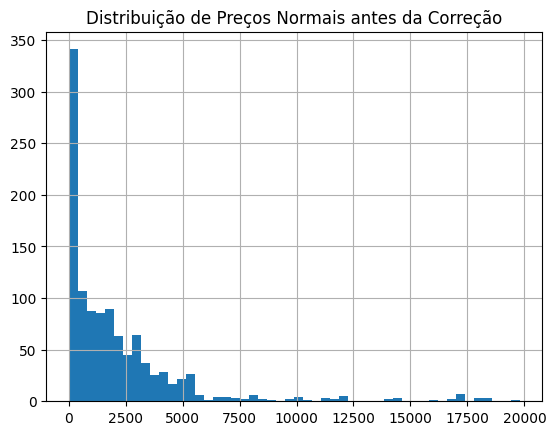

In [11]:
import matplotlib.pyplot as plt
df['Preco_Normal'].hist(bins=50)
plt.title('Distribuição de Preços Normais antes da Correção')
plt.show()

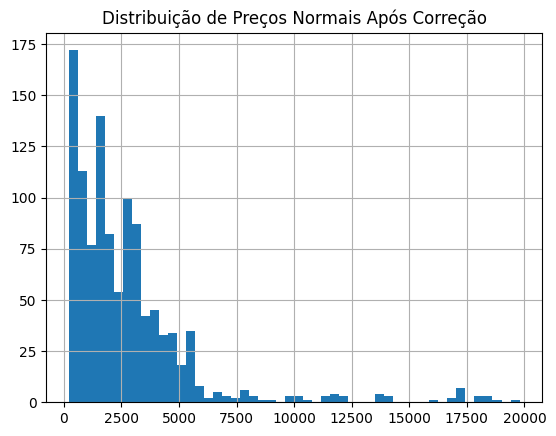

In [152]:
import matplotlib.pyplot as plt
df_corrigido['Preco_Normal'].hist(bins=50)
plt.title('Distribuição de Preços Normais Após Correção')
plt.show()

In [12]:
# Verificação se ainda há preços inválidos após as substituições:
print(f"Produtos com Preco_Normal <= 0 após correção: {len(df_corrigido[df_corrigido['Preco_Normal'] <= 0])}")

Produtos com Preco_Normal <= 0 após correção: 0


In [13]:
# Armazena os valores originais de 'Preco_Normal' antes das correções
df_corrigido['Preco_Normal_Original'] = df['Preco_Normal']

# ... aplicar correções em 'Preco_Normal' ...

# Seleciona os registros cujo 'Preco_Normal' foi corrigido (originalmente inválido e agora válido)
produtos_corrigidos = df_corrigido[
    (df_corrigido['Preco_Normal'] > 0) &  # Valor válido após correção
    (df_corrigido['Preco_Normal_Original'] <= 0)  # Valor inválido originalmente
]

# Exibe uma amostra de 5 registros corrigidos, se existirem
if len(produtos_corrigidos) > 0:
 print(produtos_corrigidos[['title', 'Preco_Normal_Original', 'Preco_Normal', 'Preco_Desconto', 'Desconto']].sample(5))
else:
    print("Nenhum produto corrigido foi identificado.")


                                                  title  \
1065            Acondicionador Pro-V Hidratación 300 ml   
917                 Crema Maggi Zapallo 54g 4 porciones   
957             Huevos grandes blancos Cintazul 30 unid   
990                          Hamburguesa de vacuno 90 g   
908   Leche semidescremada sin lactosa Loncoleche 20...   

      Preco_Normal_Original  Preco_Normal  Preco_Desconto  Desconto  
1065                      0        2739.0            1990       749  
917                       0         459.0             459         0  
957                       0        1449.0               0         0  
990                       0         649.0             529       120  
908                       0         485.0             485         0  


# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [163]:
# Agrupa por categoria e calcula média e mediana
stats_categoria = df_corrigido[df_corrigido['Preco_Normal'] > 0].groupby('Categoria')['Preco_Normal'].agg(['mean', 'median'])

# Adiciona uma coluna com a diferença relativa entre média e mediana
stats_categoria['dif_perc'] = ((stats_categoria['mean'] - stats_categoria['median']) / stats_categoria['median']) * 100

# Ordena pela maior diferença percentual
stats_categoria_ordenado = stats_categoria.sort_values(by='dif_perc', ascending=False)

# Exibe as categorias com maior diferença entre média e mediana
print(stats_categoria_ordenado)


                                   mean  median   dif_perc
Categoria                                                 
lacteos                     2652.742729  1449.0  83.074032
instantaneos-y-sopas         923.736842   579.0  59.540042
frutas                      1724.473684  1195.0  44.307421
verduras                    1440.953125  1250.0  15.276250
belleza-y-cuidado-personal  3086.067227  2739.0  12.671312
comidas-preparadas          4077.652174  3890.0   4.823963
congelados                  3217.401709  3139.0   2.497665


In [164]:
#in dentificar categorias com média muito acima ou abaixo da mediana
# “Utilizamos 20% como limite para identificar distorções relevantes entre média
#e mediana, por ser um ponto de equilíbrio amplamente utilizado em análises
# exploratórias de dados.”
limite = 20

categorias_distorcidas = stats_categoria_ordenado[
    (stats_categoria_ordenado['dif_perc'].abs() > limite)
]

print("\nCategorias com média significativamente diferente da mediana (> ±20%):")
print(categorias_distorcidas)




Categorias com média significativamente diferente da mediana (> ±20%):
                             mean  median   dif_perc
Categoria                                           
lacteos               2652.742729  1449.0  83.074032
instantaneos-y-sopas   923.736842   579.0  59.540042
frutas                1724.473684  1195.0  44.307421


Digite aqui as categorias:

**Categorias com média acima da mediana:**
Todas as categorias apresentadas têm média maior do que a mediana, o que sugere:

Distribuições assimétricas à direita (valores extremos positivos),

Presença de produtos com preços muito altos puxando a média para cima.

São elas:

* lácteos

* instantaneos-y-sopas

* frutas

* verduras

* belleza-y-cuidado-personal

* comidas-preparadas

* congelados





# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [28]:
# Calcula estatísticas de dispersão (média, mediana e desvio padrão) dos preços com desconto,
# agrupados por categoria, e armazena em um novo DataFrame chamado 'Desvio'
Desvio = df_corrigido.groupby('Categoria')['Preco_Desconto'].agg(
media = "mean",  # Calcula a média de preços por categoria
mediana = "median", #Calcula a mediana de preços por categoria
desvio_padrão = 'std' # Calcula o desvio padrão de preços por categoria (medida de dispersão)
).reset_index()

# Ordena desvio padrão em ordem decrescente,
# mostrando primeiro as categorias com maior variação de preços
Desvio_ordenados = Desvio.sort_values(by="desvio_padrão", ascending=False)

# Exibir as 5 top categorias com suas maiores variação

print(Desvio_ordenados.head())



                    Categoria        media  mediana  desvio_padrão
0  belleza-y-cuidado-personal  1047.554622      0.0    1838.041882
1          comidas-preparadas   685.434783      0.0    1712.677834
2                  congelados   892.004274      0.0    1576.119591
5                     lacteos   178.796421      0.0     799.619268
4        instantaneos-y-sopas   117.614035      0.0     192.580758


* Mediana é 0.0 em todas, o que sugere que a maior parte dos produtos tem desconto zero, enquanto poucos valores altos puxam a média para cima, elevando o desvio padrão.



In [44]:
## Analise de Quantidade de registro a sua distribuição #
# Retorna uma Series onde o índice são as categorias e os valores são as QTD de
#registro
df_corrigido.groupby('Categoria').size()


,0
Categoria,
belleza-y-cuidado-personal,238
comidas-preparadas,46
congelados,234
frutas,19
instantaneos-y-sopas,57
lacteos,447
verduras,64




* "lácteos" realmente tem muitos registros (447), o que sugere uma amostra mais robusta para análise estatística.




In [43]:
# Identificação de Outliers por Categoria usando Método IQR (Intervalo Interquartil)
for cat in df_corrigido['Categoria'].unique(): # Itera sobre cada categoria única presente na coluna 'Categoria'
# 1. Filtragem dos dados:
# Cria um subconjunto contendo apenas os preços com desconto da categoria atual
  grupo = df_corrigido[df_corrigido['Categoria'] == cat]['Preco_Desconto']
  Q1 = grupo.quantile(0.25)
  Q3 = grupo.quantile(0.75)
  IQR = Q3 - Q1
  limites = (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)
  outliers = grupo[(grupo < limites[0]) | (grupo > limites[1])]
  print(f"{cat}: {len(outliers)} outliers em {len(grupo)} registros")


lacteos: 73 outliers em 447 registros
belleza-y-cuidado-personal: 2 outliers em 238 registros
congelados: 25 outliers em 234 registros
frutas: 0 outliers em 19 registros
comidas-preparadas: 7 outliers em 46 registros
verduras: 0 outliers em 64 registros
instantaneos-y-sopas: 0 outliers em 57 registros


**Detecção de outliers com IQR**
* lácteos tem 73 outliers - 447 registros.

* beleza-y-cuidado-personal tem apenas 2 outliers - 238 registros.

* congelados tem 25  outliers - 19 registros.

* comidas-preparadas tem 7 outliers - 46 Registros.



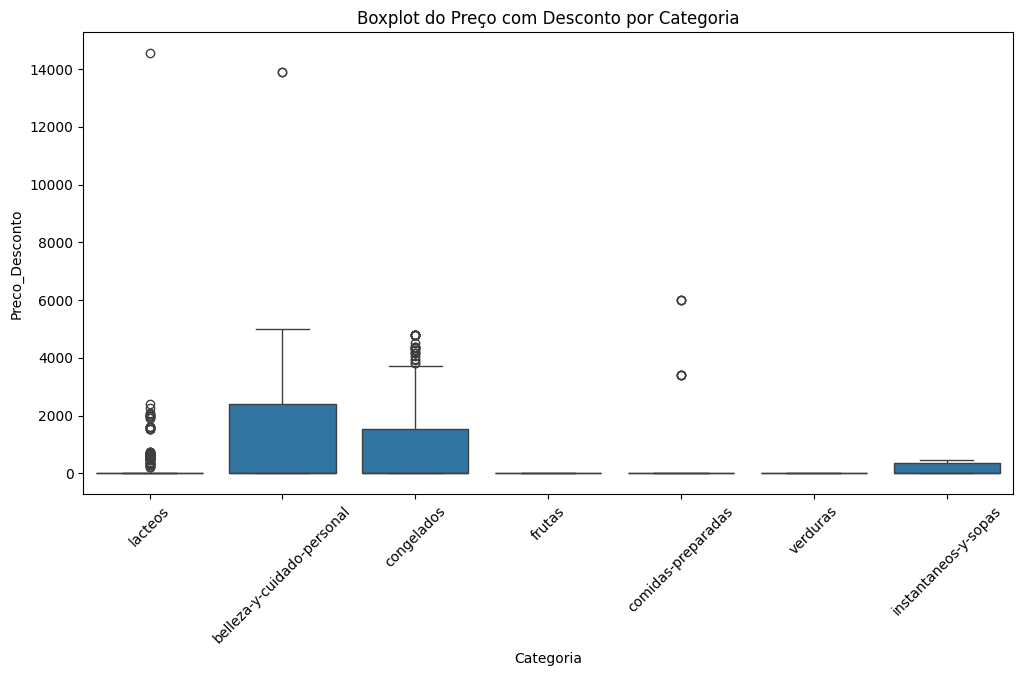

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x='Categoria', y='Preco_Desconto', data=df_corrigido)
plt.xticks(rotation=45)
plt.title("Boxplot do Preço com Desconto por Categoria")
plt.show()


:Digite nesse campo o comportamento que você identificou.
**Comportamento identificado:**

Nas categorias com maior desvio padrão:

 * A mediana dos preços com desconto é zero, enquanto a média é significativamente elevada, o que indica uma distribuição assimétrica e a presença de outliers que puxam a média para cima.

 * A categoria "lácteos" apresenta muitos valores extremos (outliers) e alta quantidade de registros, o que evidencia uma grande variabilidade nos preços e pouca homogeneidade.

 * Por outro lado, a categoria "beleza e cuidado pessoal", apesar de contar com preços mais elevados, apresenta uma distribuição mais equilibrada, com poucos outliers, o que justifica o alto desvio padrão mais consistente com a média.
 Nas categorias com maior desvio padrão:




# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

"Optei  por analisar 'comidas-preparadas' (2º maior desvio padrão = 1712.68) porque, embora 'beleza-y-cuidado-personal' tenha o maior desvio, seus outliers são tão extremos que comprometem a visualização do boxplot. Já 'comidas-preparadas' mostra uma dispersão mais homogênea e outliers analiticamente relevantes."*

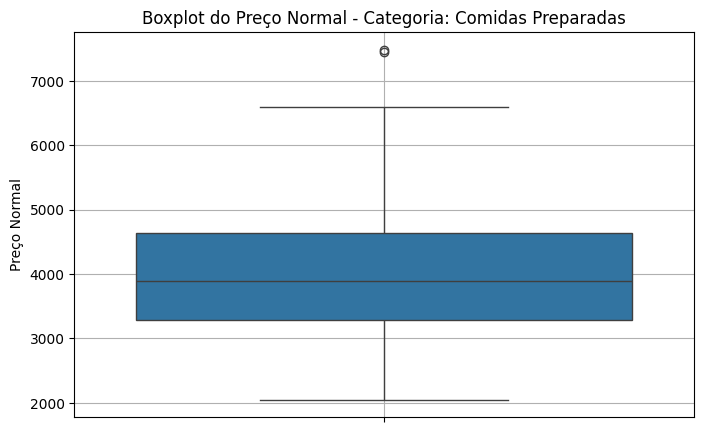

In [46]:
#Seu código aqui
import seaborn as sns
import matplotlib.pyplot as plt

# Filtra os dados apenas da categoria "comidas-preparadas"
df_comidas = df_corrigido[df_corrigido['Categoria'] == 'comidas-preparadas']

# Plota o boxplot do Preco_Normal
plt.figure(figsize=(8, 5))
sns.boxplot(y='Preco_Normal', data=df_comidas)
plt.title('Boxplot do Preço Normal - Categoria: Comidas Preparadas')
plt.ylabel('Preço Normal')
plt.grid(True)
plt.show()


# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

In [96]:
# Verificação se não ha valores nuloe e se tiver fazer a correção.
media_descontos = df_corrigido.groupby('Categoria')['Desconto'].mean().fillna(0).sort_values(ascending=False)
print(media_descontos)

Categoria
congelados                    154.688034
belleza-y-cuidado-personal    120.869748
comidas-preparadas             43.478261
lacteos                        17.411633
frutas                          0.000000
instantaneos-y-sopas            0.000000
verduras                        0.000000
Name: Desconto, dtype: float64


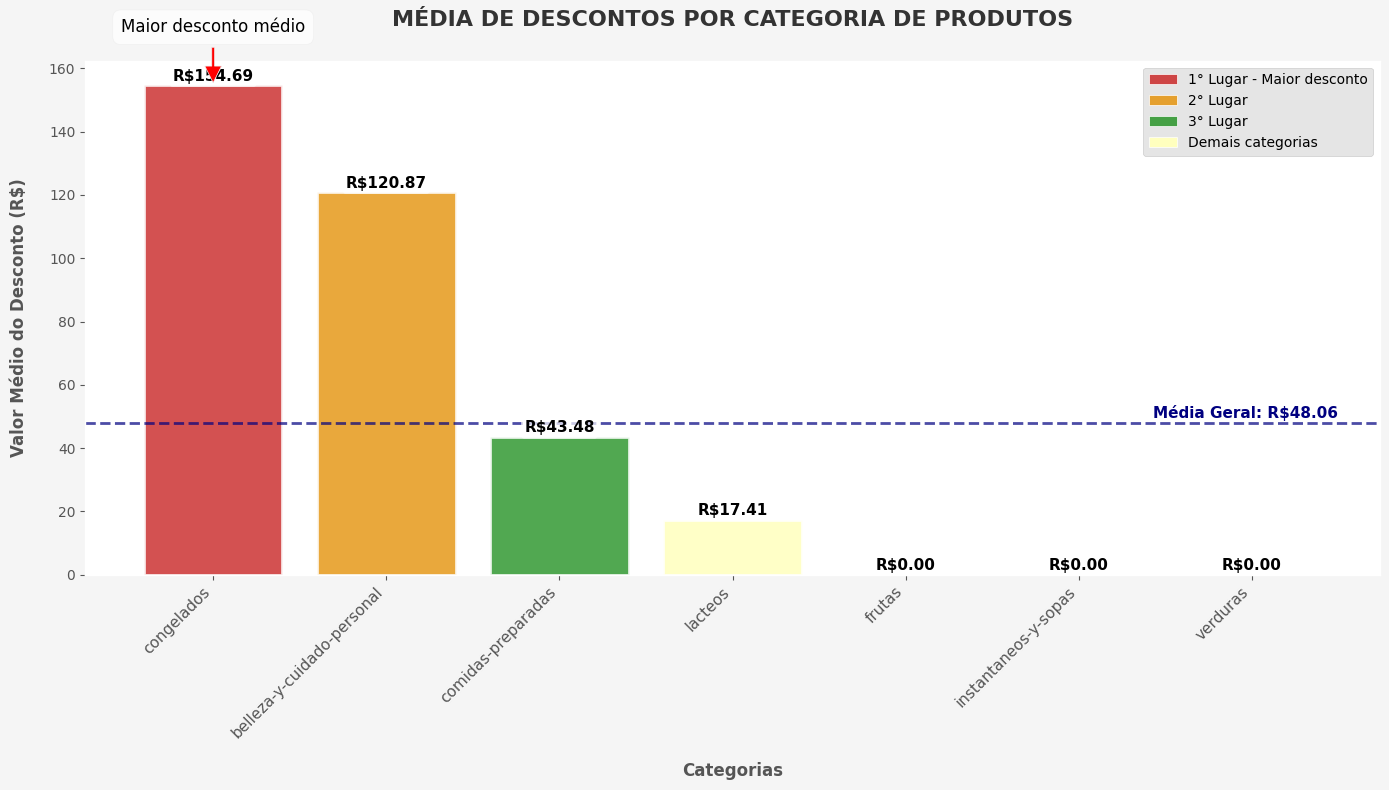

In [95]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import colormaps
cmap = colormaps['Spectral']
from matplotlib.patches import Patch

# Configuração do estilo premium
plt.style.use('seaborn-v0_8-pastel')
plt.rcParams['font.family'] = 'DejaVu Sans'  # Fonte mais limpa

# 1. Cálculo da média de descontos por categoria
media_descontos = df_corrigido.groupby('Categoria')['Desconto'].mean().sort_values(ascending=False)

# 2. Preparação da paleta de cores
cmap = plt.colormaps['Spectral']  # Ou plt.get_cmap('Spectral')
colors = cmap(np.linspace(0.1, 0.9, len(media_descontos)))
colors[0] = (0.8, 0.2, 0.2, 0.9)  # Vermelho para o top1
colors[1] = (0.9, 0.6, 0.1, 0.9)  # Laranja para o top2
colors[2] = (0.2, 0.6, 0.2, 0.9)  # Verde para o top3

# 3. Criação do gráfico
fig, ax = plt.subplots(figsize=(14, 8))

# Barras principais
bars = ax.bar(media_descontos.index,
              media_descontos.values,
              color=colors,
              edgecolor='white',
              linewidth=2,
              alpha=0.85)

# 4. Elementos visuais avançados
# Linha de média geral
mean_line = media_descontos.mean()
ax.axhline(mean_line, color='navy', linestyle='--', linewidth=2, alpha=0.7)
ax.text(len(media_descontos)-0.5, mean_line+0.5, f'Média Geral: R${mean_line:.2f}',
        ha='right', va='bottom', color='navy', fontsize=11, fontweight='bold')

# Valores nas barras com sombra
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.,
            height + 0.5,
            f'R${height:.2f}',
            ha='center',
            va='bottom',
            fontsize=11,
            fontweight='bold',
            color='black',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.2'))

# 5. Customização do eixo X
ax.set_xticks(range(len(media_descontos)))
ax.set_xticklabels(media_descontos.index, rotation=45, ha='right', fontsize=11)

# 6. Títulos e legendas
ax.set_title('MÉDIA DE DESCONTOS POR CATEGORIA DE PRODUTOS',
             fontsize=16, pad=25, fontweight='bold', color='#333333')
ax.set_xlabel('Categorias', fontsize=12, labelpad=15, fontweight='bold')
ax.set_ylabel('Valor Médio do Desconto (R$)', fontsize=12, labelpad=15, fontweight='bold')

# 7. Grade de fundo
ax.grid(axis='y', linestyle=':', alpha=0.7)

# 8. Legenda de cores
legend_elements = [
    Patch(facecolor=colors[0], edgecolor='white', label='1° Lugar - Maior desconto'),
    Patch(facecolor=colors[1], edgecolor='white', label='2° Lugar'),
    Patch(facecolor=colors[2], edgecolor='white', label='3° Lugar'),
    Patch(facecolor=colors[3], edgecolor='white', label='Demais categorias')
]
ax.legend(handles=legend_elements, loc='upper right', framealpha=1)

# 9. Ajustes finais
plt.tight_layout()
fig.patch.set_facecolor('#f5f5f5')  # Cor de fundo externa
ax.set_facecolor('white')  # Cor de fundo interna

# 10. Destaques especiais
# Seta para o maior valor
ax.annotate('Maior desconto médio',
            xy=(0, media_descontos.iloc[0]),
            xytext=(0, media_descontos.iloc[0] + max(media_descontos)*0.1),
            arrowprops=dict(facecolor='red', shrink=0.05, width=2),
            ha='center', va='bottom', fontsize=12,
            bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8))

# Para média de todas as categorias (como está atualmente):
mean_line = media_descontos.mean()

# OU para média apenas a partir do 3º lugar:
if len(media_descontos) > 2:
    mean_line = media_descontos[2:].mean()  # Pega do 3º item em diante
else:
    mean_line = media_descontos.mean()

plt.show()

Pontos importantes ;

* Maior desconto médio: A categoria Congelados lidera com um desconto médio de R$154,69, tornando-se uma excelente opção para consumidores que buscam economizar mais.

* Produtos de beleza e cuidado pessoal: Essa categoria tem o segundo maior desconto médio (R$120,87), sugerindo que promoções nessa área podem ser uma estratégia de venda eficaz.

* Baixos ou inexistentes descontos: Frutas, verduras e alimentos instantâneos/sopas não receberam descontos médios no gráfico, o que pode indicar menor margem para promoções ou menor necessidade de descontos para esses produtos.

* Media geral dos descontos: O valor médio dos descontos considerando todas as categorias é R$48,06, servindo de referência para comparar estratégias promocionais.

# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

In [100]:
import plotly.express as px
import pandas as pd

# 'Categoria', 'Marca', 'Desconto'

# 1. Calcular a média de descontos e a contagem de itens por categoria e marca
# Incluímos fillna(0) para garantir que categorias/marcas sem descontos tenham 0.0
df_agrupado = df_corrigido.groupby(['Categoria', 'Marca'], as_index=False).agg(
    media_desconto=('Desconto', 'mean'),  # Calcula a média do Desconto
    contagem_itens=('Desconto', 'size')   # Calcula o número de itens no grupo
).fillna(0) # Preenche quaisquer NaNs resultantes (embora size shouldn't produce NaN)

# 2. Criar o mapa de calor interativo
# Usamos 'contagem_itens' como 'values' para determinar o tamanho dos retângulos
# e 'media_desconto' para a cor e no hover_data
fig = px.treemap(df_agrupado,
                 path=['Categoria', 'Marca'],  # Hierarquia de agrupamento
                 values='contagem_itens',      # Tamanho dos retângulos baseado na contagem
                 color='media_desconto',       # Cor baseada na média de desconto
                 color_continuous_scale='RdYlGn',  # Escala de cores (vermelho-amarelo-verde)
                 title='Média de Descontos por Categoria e Marca',
                 hover_data={'media_desconto': ':.2f', 'contagem_itens': True},  # Formato ao passar o mouse
                 width=1000,
                 height=600)

# 3. Personalizar o layout
fig.update_layout(
    margin=dict(t=50, l=25, r=25, b=25),
    coloraxis_colorbar=dict(
        title='Média de Desconto (R$)',
        thickness=20,
        len=0.75
    ),
    hoverlabel=dict(
        bgcolor="white",
        font_size=12,
        font_family="Arial"
    )
)

# 4. Melhorar a interação e texto nos retângulos
# O texto agora mostra a média de desconto e a contagem de itens
fig.update_traces(
    texttemplate='<b>%{label}</b><br>R$ %{customdata[0]:.2f}<br>Itens: %{customdata[1]}',
    textposition='middle center',
    hovertemplate='<b>%{label}</b><br>Média de Desconto: R$ %{customdata[0]:.2f}<br>Itens: %{customdata[1]}<extra></extra>',
    # customdata é necessário para acessar as colunas não usadas em path ou values no texttemplate/hovertemplate
    customdata=df_agrupado[['media_desconto', 'contagem_itens']]
)

